In [3]:
%matplotlib notebook
import os
import pickle
import numpy as np
import get_3dhst as hst
import elgtools as elg
import matplotlib.pyplot as plt
elgdir   = os.getcwd()
import jplus
import matplotlib.gridspec as gsc

tiledata = 'tiles/tiles_data_new.tsv' 
t_info = np.loadtxt(tiledata)


fout = '%s/out/elgs.dat' % elgdir

#j0660 = jplus.datasets.fetch_jplus_filter('J0660')
#wline = 3727.0 # OII rest-frame

#z_oii = elg.zline(wline, j0660.wave, j0660.throughput)
#print 'z-range',z_oii
z_oii = [0.73, 0.79]

hstdata = hst.select_3DHST_z(z_oii[0],z_oii[1],LineName='Ha_flux',LineMin=0.01)

LoadJPLUS = False # Load a ELG catalogue of JPLUS already built

if LoadJPLUS:
    gal_elgs = pickle.load(open(fout))
else:
    mag_excess = "AND (m.MAG_APER_3_0[jplus::rSDSS]- m.MAG_APER_3_0[jplus::J0660]) > 0"
    gal_jplus = jplus.datasets.fetch_jplus_objects(mag_type="aperMags", overwrite=False, 
                                                 object_name="allELGs", nchunks=10, mag_limit=[16,24],
                                                extra_where_conds=mag_excess,db='upad')
    ijlim = 0.4
    rjlim = 0.4
    gal_elgs = elg.make_selection(gal_jplus,ijlim = ijlim, rjlim = rjlim, makeplot= False)


    with open(fout,'wb') as outfile:
        pickle.dump(gal_elgs,outfile,protocol=pickle.HIGHEST_PROTOCOL)

    
elgtiles = np.unique(gal_elgs['tile_id'])


meanAEGIS = [np.mean(hstdata['ra']), np.mean(hstdata['dec'])] # rough way to find a representative ra,dec of AEGIS

# tile closest to meanAEGIS:
id_AEGIStile = np.argmin(elg.haversine_dist(meanAEGIS[0], meanAEGIS[1], t_info[:,1], t_info[:,2]))
AEGIS_tile = t_info[id_AEGIStile,0]


    

j-plus [INFO]: Fetching J-PLUS galaxies
j-plus [INFO]:    Connecting to the upad database
j-plus [INFO]: SELECT m.alpha_j2000 as ra, m.delta_j2000 as dec, 
   m.FWHM_WORLD*3600 as fwhm, m.CLASS_STAR as cstar, m.tile_id as tile_id, m.number as object_id, 
   m.KRON_RADIUS as kron_rad, m.PETRO_RADIUS as petro_rad, m.MU_MAX[jplus::rSDSS] as mu_max_r, 
   m.MAG_APER_3_0[jplus::uJAVA] as uJAVA, m.MAG_ERR_APER_3_0[jplus::uJAVA] as uJAVA_err, 
   m.MAG_APER_3_0[jplus::gSDSS] as gJAVA, m.MAG_ERR_APER_3_0[jplus::gSDSS] as gJAVA_err, 
   m.MAG_APER_3_0[jplus::rSDSS] as rJAVA, m.MAG_ERR_APER_3_0[jplus::rSDSS] as rJAVA_err, 
   m.MAG_APER_3_0[jplus::iSDSS] as iJAVA, m.MAG_ERR_APER_3_0[jplus::iSDSS] as iJAVA_err, 
   m.MAG_APER_3_0[jplus::zSDSS] as zJAVA, m.MAG_ERR_APER_3_0[jplus::zSDSS] as zJAVA_err, 
   m.MAG_APER_3_0[jplus::J0378] as J0378, m.MAG_ERR_APER_3_0[jplus::J0378] as J0378_err, 
   m.MAG_APER_3_0[jplus::J0395] as J0395, m.MAG_ERR_APER_3_0[jplus::J0395] as J0395_err, 
   m.MAG_APER_3_0[j

Total number of tiles: 524
Total Number of candidates: 24930 


In [5]:

print AEGIS_tile, meanAEGIS, t_info[id_AEGIStile,1:]


11335.0 [214.88279943688192, 52.857105586107011] [ 214.5535   52.7209]


In [6]:
jplus_aegis = jplus.tools.select_object(gal_jplus, gal_jplus['tile_id'] == AEGIS_tile)
#print jplus_aegis
#jplus_aegis = gal_elgs

In [7]:
nhst = len(hstdata['ra'])
hst_coords = np.zeros([nhst,2])

for i in range(nhst):
    hst_coords[i,:] = [hstdata['ra'][i],hstdata['dec'][i]]

print hst_coords[0:10]
print hstdata['ra'][0:10]
hstdata['coords'] = hst_coords

[[ 214.90447998   52.84347534]
 [ 214.90791321   52.84882736]
 [ 214.91755676   52.85950089]
 [ 214.90710449   52.853405  ]
 [ 214.90548706   52.84733963]
 [ 214.88502502   52.8384285 ]
 [ 214.89598083   52.8502388 ]
 [ 214.90010071   52.85657883]
 [ 214.88769531   52.85098648]
 [ 214.90092468   52.86254883]]
[ 214.90447998  214.90791321  214.91755676  214.90710449  214.90548706
  214.88502502  214.89598083  214.90010071  214.88769531  214.90092468]


In [8]:
xmatch = elg.find_xmatches(jplus_aegis, hstdata,getz = True, zcoord = 'z')


In [9]:
print len(xmatch)

39


In [10]:
print xmatch.keys()
print len(gal_elgs['coords'][:,0])

['flag_uJAVA', 'J0395', 'flag_J0660', 'flag_J0861', 'flag_J0515', 'ISOAREA_WORLD', 'J0861', 'object_id', 'J0410', 'fwhm', 'flag_J0378', 'mu_max_r', 'flag_zJAVA', 'J0430', 'filename', 'mag_auto_r', 'zJAVA', 'uJAVA', 'kron_rad', 'date', 'iJAVA', 'cstar', 'tile_id', 'SQL_query', 'flag_rJAVA', 'gJAVA', 'XY_IMAGE', 'flag_iJAVA', 'J0378', 'flag_J0430', 'petro_rad', 'flag_J0410', 'J0660', 'coords', 'J0515', 'flag_gJAVA', 'z', 'flag_J0395', 'rJAVA']
108146


<IPython.core.display.Javascript object>


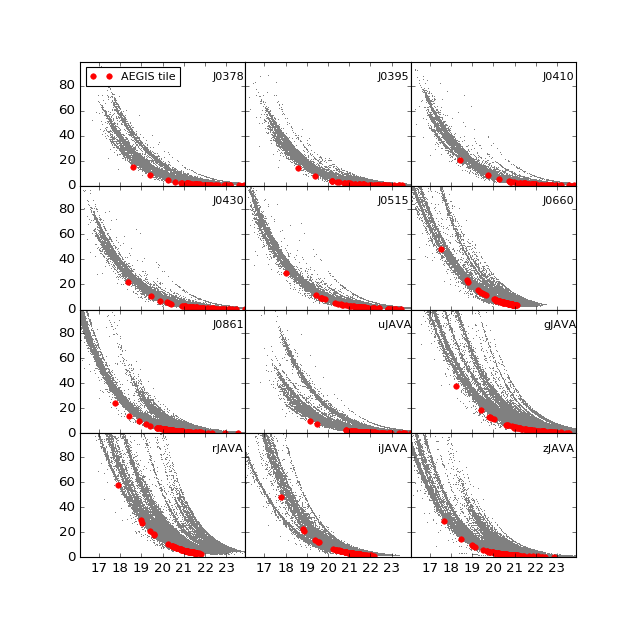

(52.571439486300001, 53.142676287274995)

In [11]:
plt.figure(2)

plt.plot(hstdata['coords'][:,0], hstdata['coords'][:,1],'o',color='red')
plt.plot(jplus_aegis['coords'][:,0], jplus_aegis['coords'][:,1],'o',color='green',markersize=5)
plt.xlim([hstdata['ra'].min()*.9975,hstdata['ra'].max()*1.0025])
plt.ylim([hstdata['dec'].min()*.9975,hstdata['dec'].max()*1.0025])          

In [12]:
xmatch['tile_id']

array([], dtype=int64)

In [30]:
data_tiles = np.unique(gal_jplus['tile_id'])

gs = gsc.GridSpec(4,3)
gs.update(wspace=0.0, hspace=0.0)

filternames = [ 'J0378','J0395', 'J0410','J0430','J0515', 'J0660',
               'J0861','uJAVA', 'gJAVA', 'rJAVA', 'iJAVA','zJAVA']

idf = 0
for ix in range(4):
    for iy in range(3):

        ax = plt.subplot(gs[ix,iy])
        for tile in data_tiles:
            jp = jplus.tools.select_object(gal_elgs,gal_elgs['tile_id'] == tile)
            ax.plot(jp[filternames[idf]][:,0], 1/jp[filternames[idf]][:,1], ',',color = 'gray')

        jpa = jplus.tools.select_object(gal_elgs,gal_elgs['tile_id'] == AEGIS_tile)
        ax.plot(jpa[filternames[idf]][:,0], 1/jpa[filternames[idf]][:,1], '.',color = 'red', markersize= 10,
        label='AEGIS tile' if idf == 0 else '')
    
        
        ax.text(0.8,0.85,filternames[idf],transform=ax.transAxes,fontsize=10)
        ax.legend(loc='upper left',fontsize=10)
        ax.set_xlim([16.1,23.9])
        ax.set_ylim([0,99])
        if iy >0:
            ax.set_yticklabels([])
            
        idf += 1

        